# Supprot Vector Machine (SVM)

## SVM은 Support Vector 와 Hyperplane을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘

#### 2차원 공간에서, 즉 데이터에 2개의 클래스만 존재할 때,
#### Decision Boundary (결정 경계) : 두 개의 클래스를 구분해 주는 선
#### Support Vector: Decision Boundary에 가까이 있는 데이터
#### Margin: Decision Boundary와 Support Vector 사이의 거리

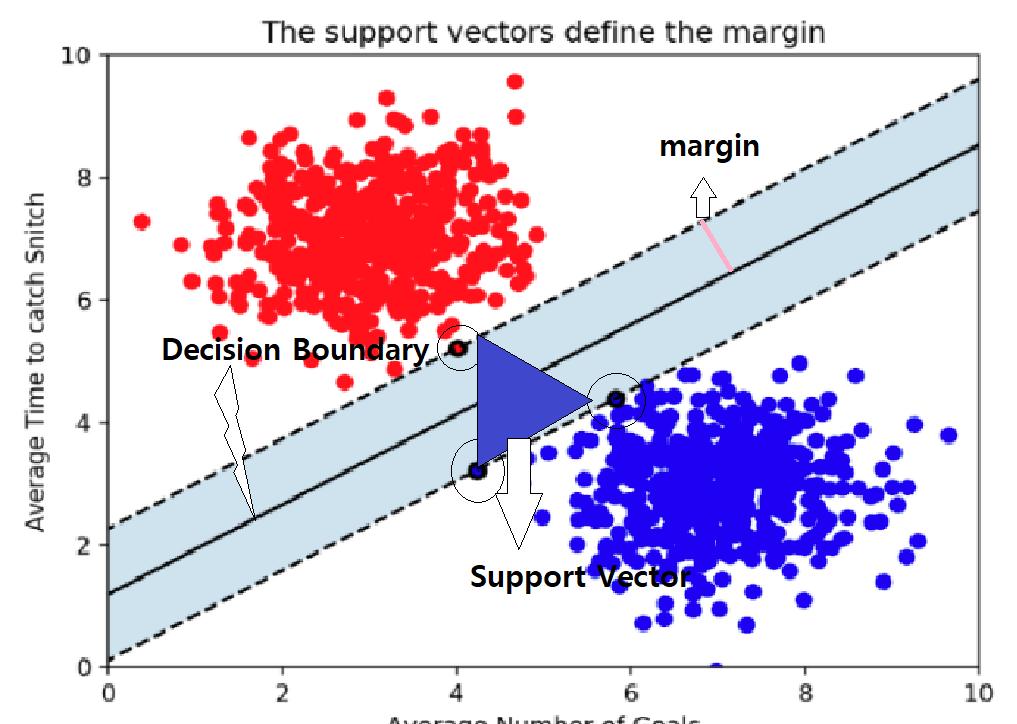

#### Margin이 넓을수록 새로운 데이터를 잘 구분할 수 있다 (Margin 최대화 -> robustness 최대화)

#### Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업. Linearly separable하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable 하도록 만든다.

#### cost: Decision Boundary와 Margin의 간격 결정. cost가 높으면 Margin이 좁아지고 train error가 작아진다. 그러나 새로운 데이터에서는 분류를 잘 할 수 있다. cost가 낮으면 Margin이 넓어지고, train error는 커진다.

#### Y: 한 train data당 영향을 미치는 범위 결정. Y가 커지면 영향을 미치는 범위가 줄어들고, Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다. 따라서 Decision Boundary는 구불구불하게 그어진다. (오버피팅 초래 가능) 작아지면 데이터가 영향을 미치는 범위가 커지고, 대부분의 데이터가 Decision Boundary에 영향을 준다. 따라서 Decision Boundary는 직선에 가까워진다.

## SVM 모델의 사용법

In [2]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [7]:
from sklearn.datasets import load_iris # iris의 데이터를 가져온다.
from sklearn.model_selection import train_test_split # training 과 test 데이터 분류
from sklearn.tree import DecisionTreeClassifier # DicisionTree 가져옴
from sklearn.metrics import classification_report # 결과값 낼때 사용

iris = load_iris() #iris 변수에 가져온 iris 데이터 할당
iris_data = iris.data #iris_data에 iris의 data값 할당
iris_label = iris.target #iris의 target 값 할당

x_train, x_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size = 0.2,
                                                    random_state = 7)

svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



# Stochastic Gradient Descent Calssfier (SGDClassifier)

## SGD란?
### 배치 크기가 1인 경사 하강법 알고리즘. 즉, 확률적 경사하강법은 데이터 세트에서 무작위로 균일하게 선택한 하나의 데이터 포인트를 이용하여 각 단계의 예측경사를 계산한다.
## 배치란?
### 경사하강법에서 배치는 단일 반복에서 기울기를 계산하는 데 사용하는 data의 총 개수이다.
### 데이터 세트에서 data를 무작위로 선택하면 훨씬 적은 데이터 세트로 중요한 평균값을 추정할 수 있다. SGD는 이 아이디어를 더욱 확장한 것으로, 반복당 하나의 data만을 사용한다.
### <단점> 반복이 충분하면 SGD가 효과는 있지만 노이즈가 매우 심하다. 확률적 경사하강법의 여러 변형함수의 최저점에 가까운 점을 찾을 가능성이 높지만 항상 보장되지는 않음. (최저점을 못찾을 수도 있음.)
### <단점 극복하기> 미니 배치 확률적 경사하강법 (미니배치 SGD)는 전체배치 SGD의 절충안

## 미니배치 SGD란?
### 수십억, 수천억개에 달할 수 있는 데이터를 10개에서 1000개 사이로 구성. 전체 배치 SGD보다 효율적이며 노이즈도 적음

## SGD Classifier 모델의 사용법

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [10]:
sgd_model.fit(x_train,y_train)
s_pred = sgd_model.predict(x_test)

print(classification_report(y_test, s_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.60      1.00      0.75        12
           2       1.00      0.36      0.53        11

    accuracy                           0.73        30
   macro avg       0.87      0.74      0.74        30
weighted avg       0.84      0.73      0.71        30



# Logistic Regression

## 소프트맥스 함수를 사용한 다중 클래스 분류 알고리즘
### 소프트맥스 함수: 클래스가 N개일 때, N차원의 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수. 아래의 그림은 4차원의 벡터를 입력받으로 받아 3개의 클래스를 예측하는 경우로 동작 과정을 보여준다.

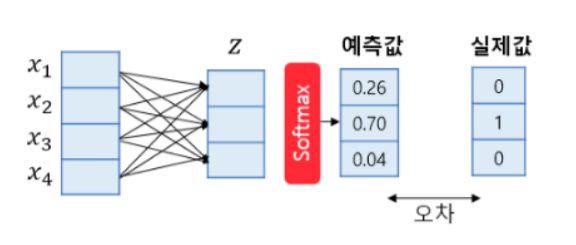

## Logistic Regression 모델의 사용법

In [13]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [21]:
logistic_model.fit(x_train, y_train)
l_pred = logistic_model.predict(x_test)

print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
